In [1]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress warnings
warnings.filterwarnings('ignore')

# Set matplotlib inline for Colab
%matplotlib inline

In [9]:
# Load the dataset
# In Colab, you might need to upload the file first using: files.upload()
df = pd.read_csv('Housing.csv')

# Display sample of the dataset
print("Sample of the dataset:")
print(df.sample(5))

# Check number of columns
columns = df.columns
print(f"\nNumber of Columns: {len(columns)}\n")
print(columns)

Sample of the dataset:
       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
55   7350000   6000         3          1        2      yes        no       no   
143  5600000   4800         5          2        3       no        no      yes   
224  4760000  10240         2          1        1      yes        no       no   
488  2852500   5200         4          1        3      yes        no       no   
244  4550000   5320         3          1        2      yes       yes      yes   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
55               no             yes        1       no      unfurnished  
143             yes              no        0       no      unfurnished  
224              no             yes        2      yes      unfurnished  
488              no              no        0       no      unfurnished  
244              no              no        0      yes   semi-furnished  

Number of Columns: 13

Index(['price', 'area', 'bed

In [10]:
# Check basic info
print("\nDataset Info:")
print(df.info())

# Statistical analysis
print("\nStatistical Description:")
print(df.describe())

# Check null values
print("\nNull Values:")
print(df.isnull().sum().sort_values(ascending=False))

# Check unique values
print("\nUnique Values:")
print(df.nunique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Statistical Description:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  

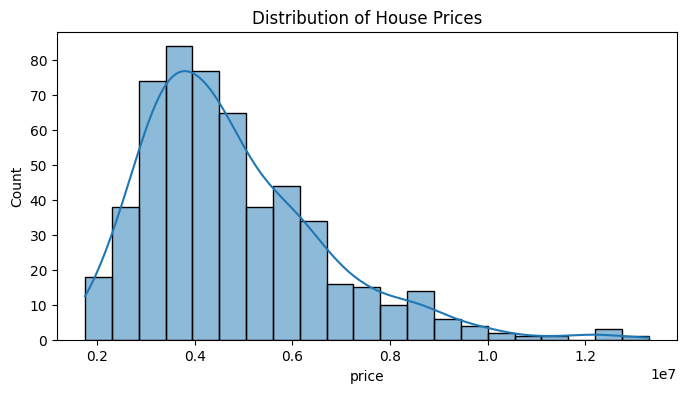

In [11]:
# Plot histogram of price
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

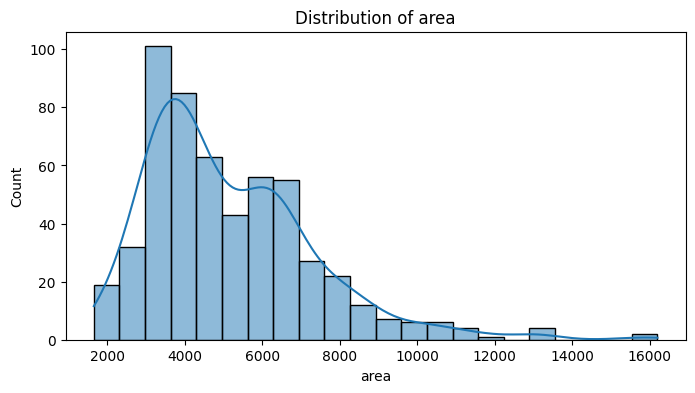

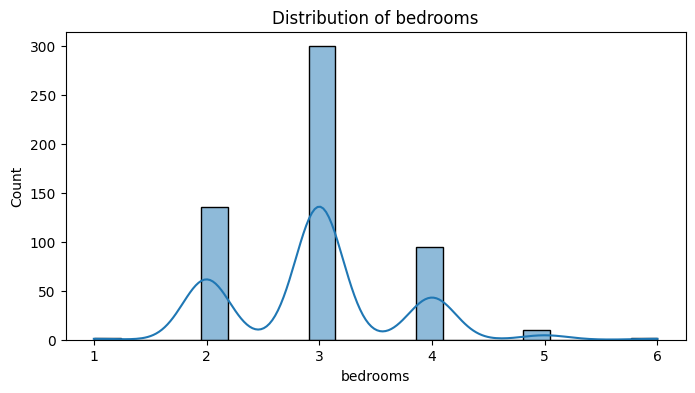

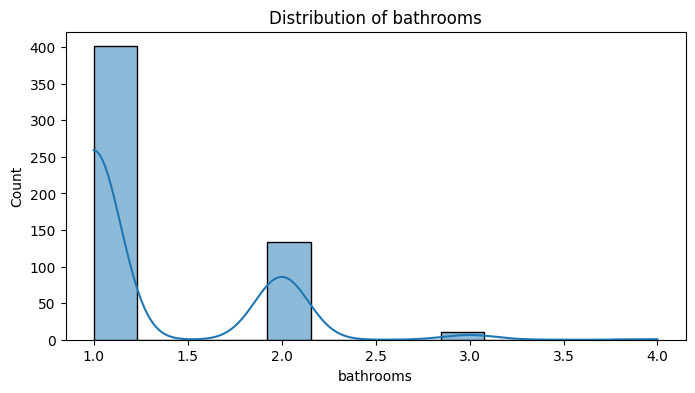

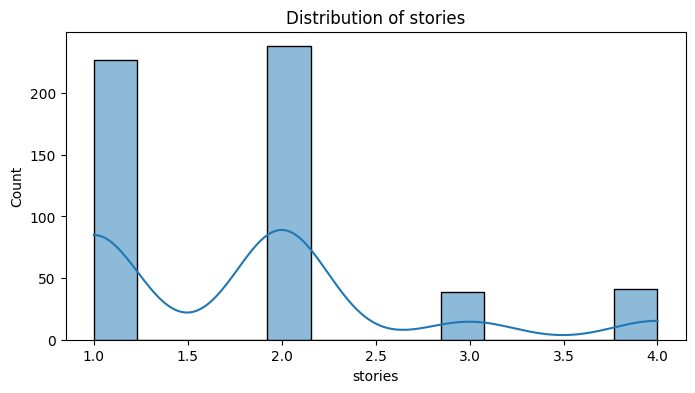

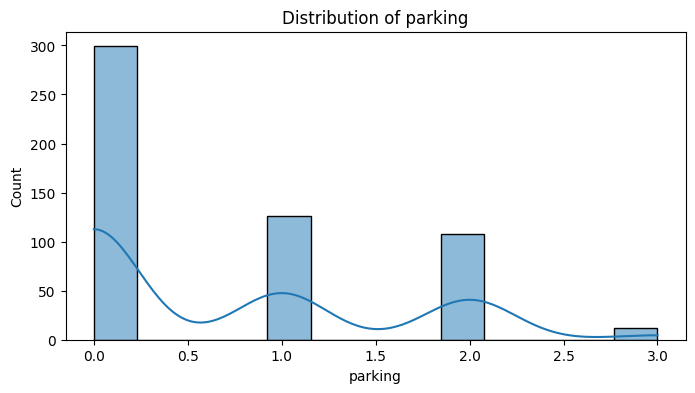

In [12]:
# Check distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    if feature != 'price':
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], kde=True)
        plt.title(f"Distribution of {feature}")
        plt.show()

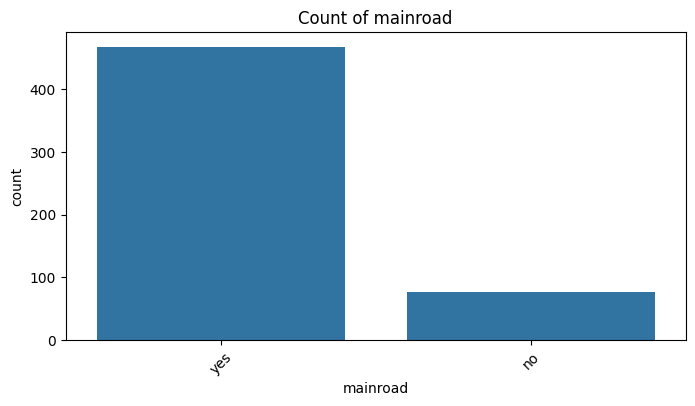

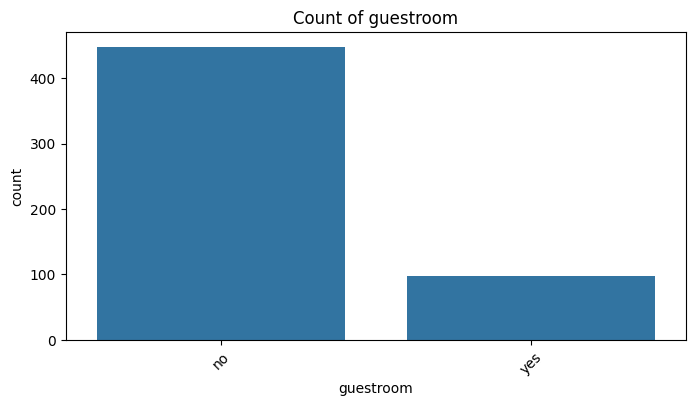

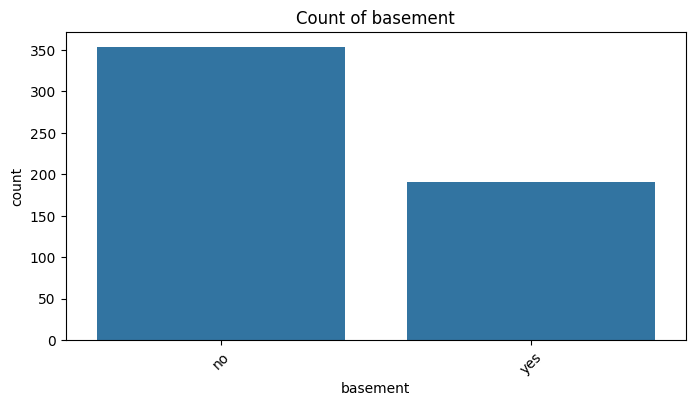

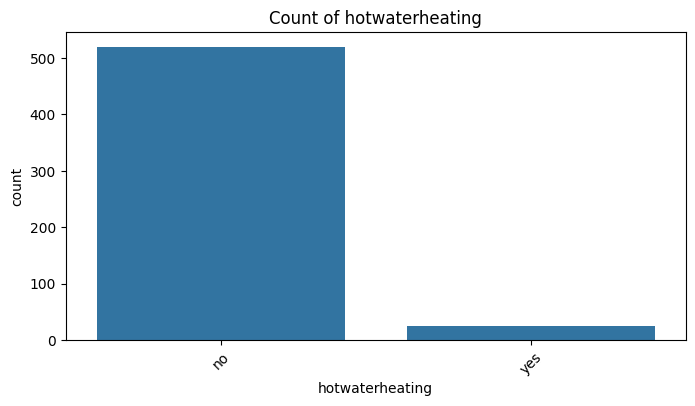

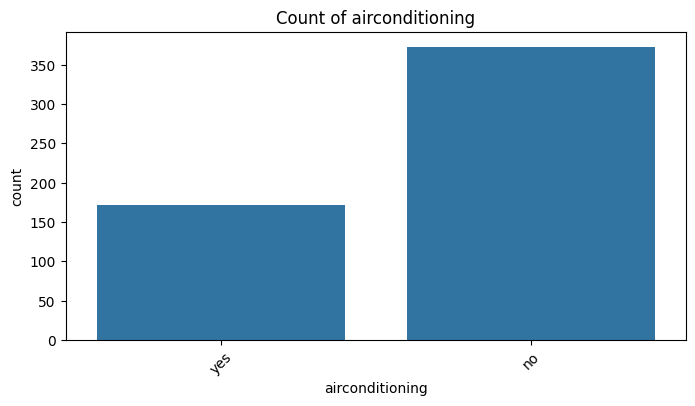

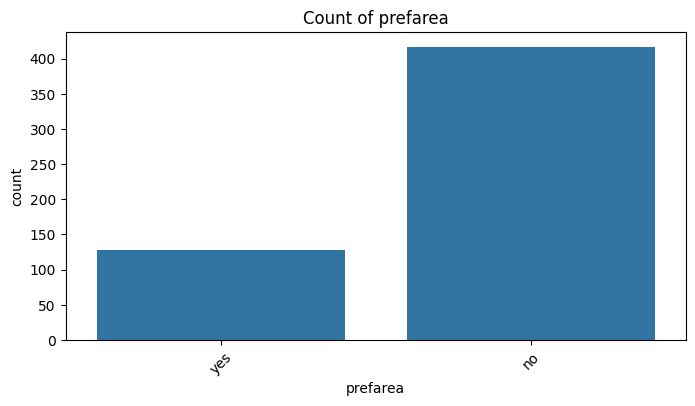

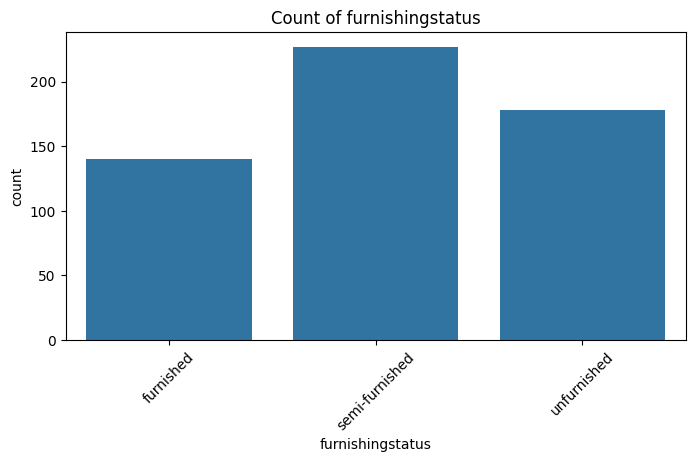

In [13]:
# Plot categorical features
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f"Count of {feature}")
    plt.xticks(rotation=45)
    plt.show()

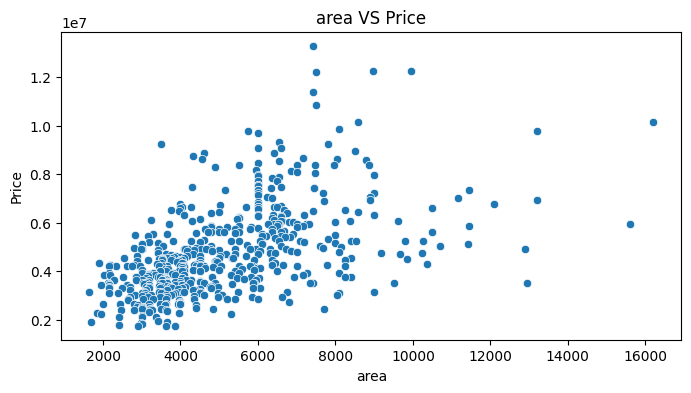

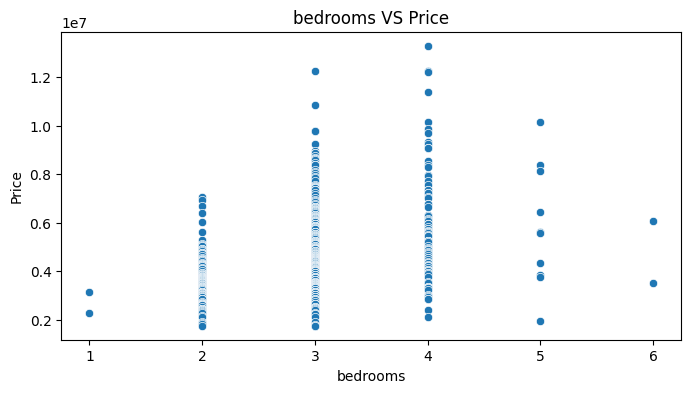

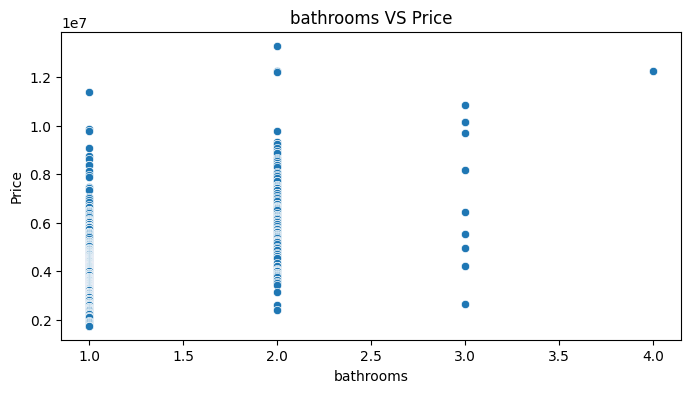

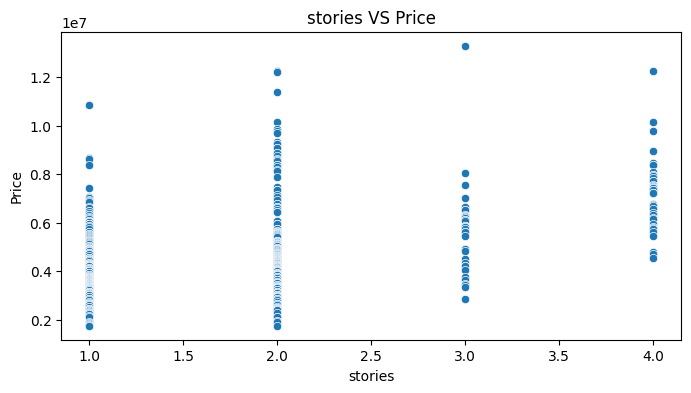

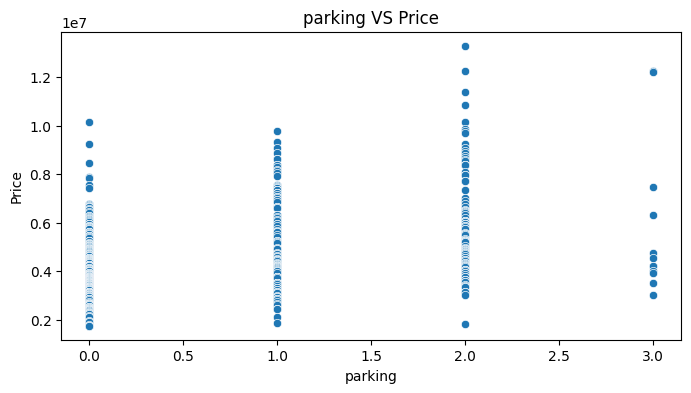

In [14]:
# Scatter plots of numerical features vs price
for feature in numerical_features:
    if feature != 'price':
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=feature, y='price')
        plt.xlabel(f'{feature}')
        plt.ylabel("Price")
        plt.title(f"{feature} VS Price")
        plt.show()

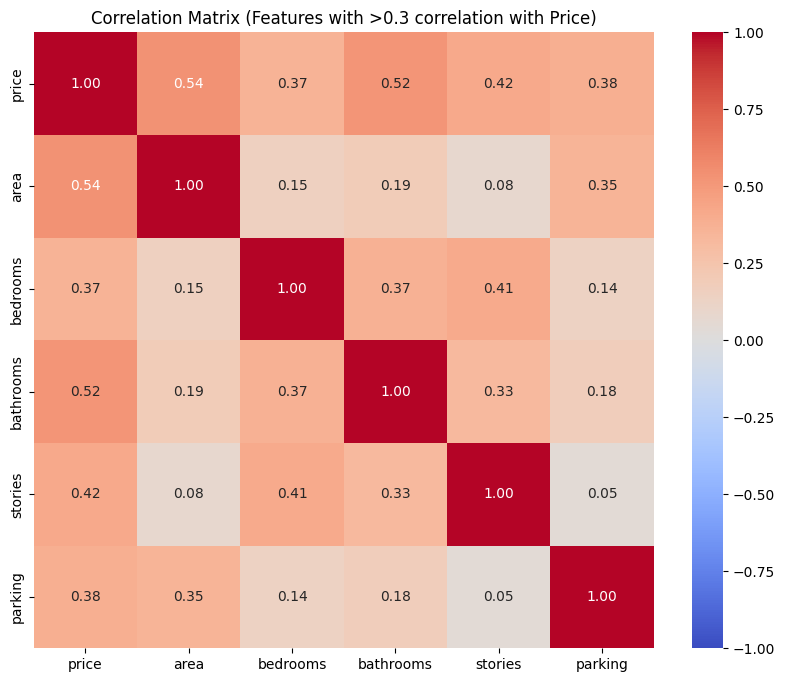


Features highly correlated with Price:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [15]:
# Correlation matrix
correlation_matrix = df[numerical_features].corr()
threshold = 0.3
price_corr = correlation_matrix['price']
high_corr = correlation_matrix[price_corr > threshold]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Features with >0.3 correlation with Price)")
plt.show()

print("\nFeatures highly correlated with Price:")
print(high_corr.index.tolist())

In [16]:
# Prepare data for modeling
target_col = 'price'
features_cols = [col for col in ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
                if col in df.columns]

X = df[features_cols]
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 436
Testing set size: 109


In [17]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(),
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

In [18]:
# Print results
print("\nModel Performance Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

# Create comparison DataFrame
results_df = pd.DataFrame(results).T
print("\nComparison of All Models:")
print(results_df)


Model Performance Results:

Linear Regression:
MAE: 1127483.352323519
MSE: 2292721545725.3623
RMSE: 1514173.5520492233
R²: 0.5464062355495871

Decision Tree:
MAE: 1442133.5779816513
MSE: 4458045777576.351
RMSE: 2111408.4819324636
R²: 0.11801685201882306

Random Forest:
MAE: 1152029.5941896024
MSE: 2659201526647.095
RMSE: 1630705.8369451847
R²: 0.4739015589777916

Support Vector Regressor (SVR):
MAE: 1763889.1880759846
MSE: 5567926059723.8545
RMSE: 2359645.3249850613
R²: -0.10156270233534426

K-Nearest Neighbors (KNN):
MAE: 1313675.2293577981
MSE: 3212502486238.532
RMSE: 1792345.5264648423
R²: 0.36443607870478123

Comparison of All Models:
                                         MAE           MSE          RMSE  \
Linear Regression               1.127483e+06  2.292722e+12  1.514174e+06   
Decision Tree                   1.442134e+06  4.458046e+12  2.111408e+06   
Random Forest                   1.152030e+06  2.659202e+12  1.630706e+06   
Support Vector Regressor (SVR)  1.763889e+06  5.